In [1]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
period = 'april2022'
full_graph_path = f'../../data/graphs/{period}_Lspace.graphml'
g = ig.Graph.Read(full_graph_path)

In [3]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1000, 1000),
}

In [4]:
g.summary()

'IGRAPH DN-- 428 1173 -- \n+ attr: betweennes (v), closeness (v), degree (v), id (v), label (v), lat (v), lon (v), name (v), pagerank (v), pagerank_num_train (v), strength_num_train (v), total_train (v), num_train (e), time_second (e)'

In [5]:
max(g.es["num_train"])

190.142857142857

# Network Analysis

### Average Degree

In [6]:
average_degree = g.degree(vertices=g.vs, mode="all")
average_degree = (average_degree - np.min(average_degree))/(np.max(average_degree)-np.min(average_degree))
np.mean(average_degree)


0.23585833743236595

In [7]:
w_average_degree = g.strength(vertices=g.vs, mode="all", weights=g.es["num_train"])
w_average_degree = (w_average_degree - np.min(w_average_degree))/(np.max(w_average_degree)-np.min(w_average_degree))
np.mean(w_average_degree)

0.0863823866604748

In [8]:
a = np.array(average_degree)
print(f'Top 10 vertex by degree:')
for i in utils.top_n_indices(a, 10):
    print(f"label: {g.vs[i]['label']}, a: {a[i]}")

Top 10 vertex by degree:
label: MONZA, a: 1.0
label: MILANO LAMBRATE, a: 1.0
label: SARONNO, a: 1.0
label: BRESCIA, a: 0.9473684210526315
label: TREVIGLIO, a: 0.8947368421052632
label: RHO FIERA, a: 0.8421052631578947
label: GALLARATE, a: 0.8421052631578947
label: PAVIA, a: 0.7894736842105263
label: LECCO, a: 0.7894736842105263
label: MILANO ROGOREDO, a: 0.7368421052631579


In [9]:
a = np.array(w_average_degree)
print(f'Top 10 vertex by weighted degree:')
for i in utils.top_n_indices(a, 10):
    print(f"label: {g.vs[i]['label']}, a: {a[i]}")

Top 10 vertex by weighted degree:
label: MILANO BOVISA FNM, a: 1.0
label: SARONNO, a: 0.7193322981366456
label: MONZA, a: 0.47884316770186314
label: MILANO DOMODOSSOLA, a: 0.4728260869565213
label: MILANO DATEO, a: 0.47175854037267073
label: MILANO PORTA VITTORIA, a: 0.4717585403726707
label: MILANO PORTA GARIBALDI SOTTERRANEA, a: 0.4710791925465838
label: MILANO REPUBBLICA, a: 0.4710791925465838
label: MILANO PORTA VENEZIA, a: 0.4710791925465838
label: MILANO LANCETTI, a: 0.47039984472049684


### Degree distribution

Text(0.5, 1.0, 'Weighted Degree distribution')

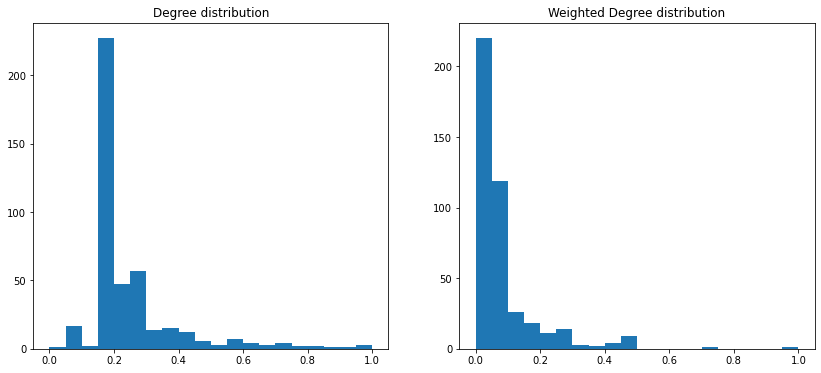

In [10]:
bins = len([val for bin1, bin2, val in g.degree_distribution().bins()])
fig, (axs1, axs2) = plt.subplots(1, 2)
fig.set_size_inches(14, 6)
axs1.hist(average_degree, bins)
axs1.set_title("Degree distribution")
axs2.hist(w_average_degree, bins)
axs2.set_title("Weighted Degree distribution")


### Diameter

In [11]:
g.diameter()

26

### Average path lenght/distance

In [12]:
g.average_path_length()

9.527041776129963

### Assortativity

In [13]:
g.assortativity_degree(directed=True)

0.2282961704369721

In [14]:
g.assortativity(types1=g.vs["total_train"], directed=True)

0.5693539436467856

### Clustering coeff
Grado in cui i vicini di un dato nodo si collegano tra loro ([0-1]):
* 0: nessun collegamento tra i vicini
* 1: i vicini formano un grafo completo

Abbiamo molti nodi con grado basso ma coeff alto (spoke), quindi questi nodi fanno parte di una componente locale di vicinato molto densa, mentre i vicini degli hub sono molto più sparsi (parte bassa a destra).

Text(0.5, 1.0, 'Weighted Clustering Coeff')

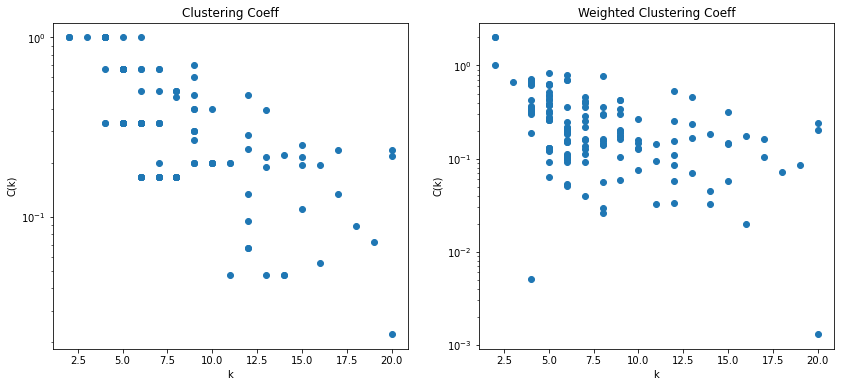

In [15]:
# TODO: Sarebbe più interessante al massimo verificarla per un nodo d'interesse
#g.transitivity_avglocal_undirected()

fig, (axs1, axs2) = plt.subplots(1, 2)
fig.set_size_inches(14, 6)

axs1.scatter(g.degree(), g.transitivity_local_undirected())
axs1.set_xlabel("k")
axs1.set_ylabel("C(k)")
axs1.set_yscale('log')
axs1.set_title("Clustering Coeff")

axs2.scatter(g.degree(), g.transitivity_local_undirected(weights=g.es["num_train"]))
axs2.set_xlabel("k")
axs2.set_ylabel("C(k)")
axs2.set_yscale('log')
axs2.set_title("Weighted Clustering Coeff")

In [16]:
# Average clustering coefficient
g.transitivity_undirected()

0.22216547497446373

# Importanza delle stazioni

### Degree centrality

Top 10 vertex by indegree_centrality:
label: MILANO LAMBRATE, indegree_centrality: 11
label: SARONNO, indegree_centrality: 10
label: RHO FIERA, indegree_centrality: 10
label: MONZA, indegree_centrality: 10
label: TREVIGLIO, indegree_centrality: 10
label: BRESCIA, indegree_centrality: 9
label: MILANO PORTA GARIBALDI, indegree_centrality: 9
label: MILANO ROGOREDO, indegree_centrality: 8
label: GALLARATE, indegree_centrality: 8
label: LECCO, indegree_centrality: 8


/tmp/ipykernel_14433/2882586582.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))


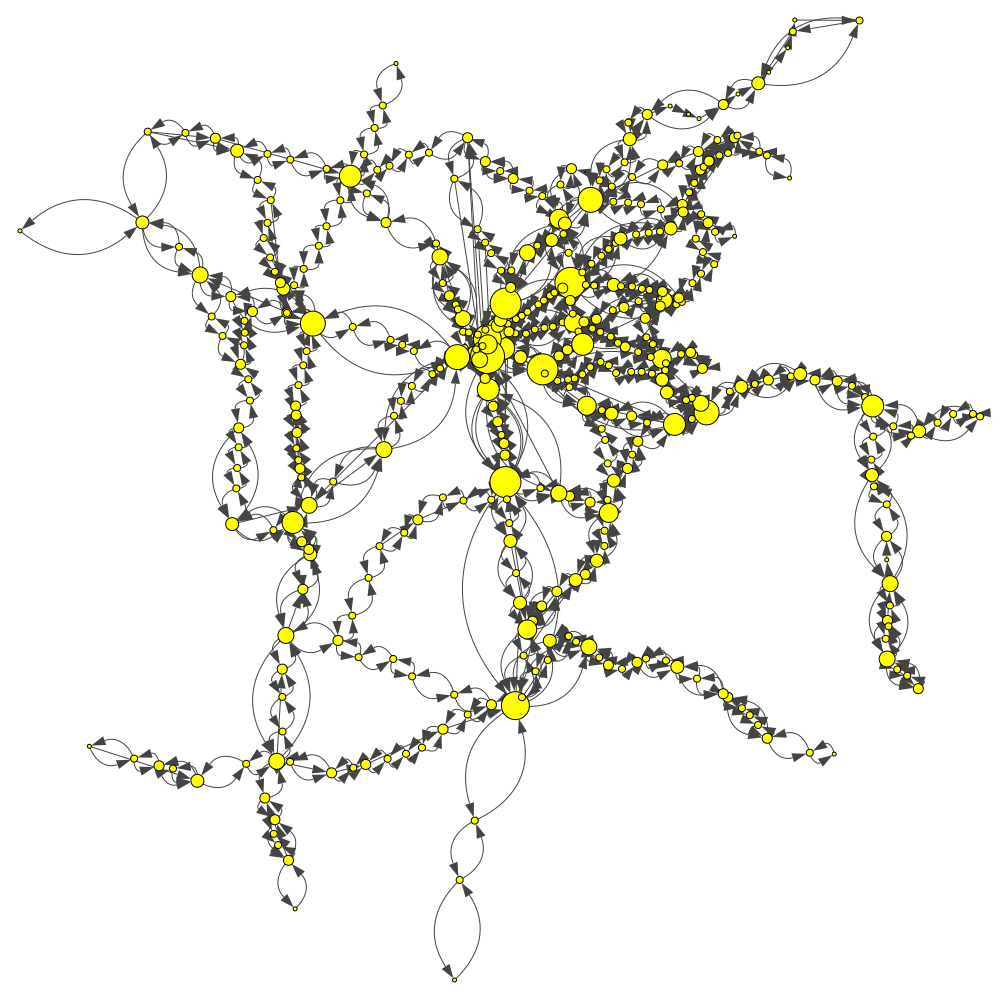

In [17]:
indegree_centrality = np.array(g.degree(g.vs, mode="in-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(indegree_centrality)+1,
    'vertex_label': ' '
}

print(f'Top 10 vertex by indegree_centrality:')
for i in utils.top_n_indices(indegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, indegree_centrality: {indegree_centrality[i]}")

ig.plot(g, vertex_color = 'yellow', **vs)

In [18]:
outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))

vs = {
    **VISUAL_STYLE,
    'vertex_size': 3*np.array(outdegree_centrality)+1,
    'vertex_label': ' ',
    'edge_label': ''
}

print(f'Top 10 vertex by outdegree_centrality:')
for i in utils.top_n_indices(outdegree_centrality, 10):
    print(f"label: {g.vs[i]['label']}, outdegree_centrality: {outdegree_centrality[i]}")

# ig.plot(g, vertex_color = 'green', **vs)

Top 10 vertex by outdegree_centrality:
label: MONZA, outdegree_centrality: 10
label: SARONNO, outdegree_centrality: 10
label: BRESCIA, outdegree_centrality: 10
label: GALLARATE, outdegree_centrality: 9
label: MILANO LAMBRATE, outdegree_centrality: 9
label: CODOGNO, outdegree_centrality: 8
label: PAVIA, outdegree_centrality: 8
label: LECCO, outdegree_centrality: 8
label: TREVIGLIO, outdegree_centrality: 8
label: CALOLZIOCORTE OLGINATE, outdegree_centrality: 8


/tmp/ipykernel_14433/4019041301.py:1: DeprecationWarning: Partial string matches of enum members are deprecated since igraph 0.9.3; use strings that identify an enum member unambiguously.
  outdegree_centrality = np.array(g.degree(g.vs, mode="out-degree"))


In [19]:
weighted_in_centrality = np.array(g.strength(g.vs, mode="in", loops=True, weights=g.es['num_train']))
weighted_in_centrality = weighted_in_centrality.astype(int)

print(f'Top 10 vertex by weighted_in_centrality:')
for i in utils.top_n_indices(weighted_in_centrality, 10):
    print(f"label: {g.vs[i]['label']}, weighted_in_centrality: {int(weighted_in_centrality[i])}")

Top 10 vertex by weighted_in_centrality:
label: MILANO BOVISA FNM, weighted_in_centrality: 738
label: SARONNO, weighted_in_centrality: 527
label: MONZA, weighted_in_centrality: 352
label: MILANO DOMODOSSOLA, weighted_in_centrality: 348
label: MILANO DATEO, weighted_in_centrality: 347
label: MILANO PORTA VITTORIA, weighted_in_centrality: 347
label: MILANO PORTA GARIBALDI SOTTERRANEA, weighted_in_centrality: 347
label: MILANO REPUBBLICA, weighted_in_centrality: 347
label: MILANO PORTA VENEZIA, weighted_in_centrality: 347
label: MILANO LANCETTI, weighted_in_centrality: 346


In [20]:
weighted_out_centrality = np.array(g.strength(g.vs, mode="out", loops=True, weights=g.es['num_train']))
weighted_out_centrality = weighted_out_centrality.astype(int)

print(f'Top 10 vertex by weighted_out_centrality:')
for i in utils.top_n_indices(weighted_out_centrality, 10):
    print(f"label: {g.vs[i]['label']}, weighted_out_centrality: {int(weighted_out_centrality[i])}")

Top 10 vertex by weighted_out_centrality:
label: MILANO BOVISA FNM, weighted_out_centrality: 733
label: SARONNO, weighted_out_centrality: 532
label: MONZA, weighted_out_centrality: 352
label: MILANO DOMODOSSOLA, weighted_out_centrality: 348
label: MILANO DATEO, weighted_out_centrality: 348
label: MILANO REPUBBLICA, weighted_out_centrality: 347
label: MILANO PORTA VENEZIA, weighted_out_centrality: 347
label: MILANO PORTA VITTORIA, weighted_out_centrality: 347
label: MILANO PORTA GARIBALDI SOTTERRANEA, weighted_out_centrality: 347
label: MILANO LANCETTI, weighted_out_centrality: 346


### Betweenness centrality

In [21]:
betweeness = np.array(g.betweenness(directed=True))
betweeness = betweeness.astype(int)
vs = {
    **VISUAL_STYLE,
    'vertex_size': betweeness/1000
}

print(f'Top 10 vertex by betweenness (normalized):')
for i in utils.top_n_indices(betweeness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {betweeness[i]}")

# ig.plot(g, **vs)

Top 10 vertex by betweenness (normalized):
label: MILANO LAMBRATE, betweeness: 79782
label: MILANO ROGOREDO, betweeness: 62740
label: MONZA, betweeness: 61435
label: MILANO CENTRALE, betweeness: 49915
label: TREVIGLIO, betweeness: 44103
label: LECCO, betweeness: 40462
label: MILANO PORTA GARIBALDI, betweeness: 37967
label: RHO FIERA, betweeness: 35381
label: MILANO BOVISA FNM, betweeness: 35351
label: BRESCIA, betweeness: 34003


In [22]:
w_betweeness = np.array(g.betweenness(directed=True, weights=g.es['num_train']))
w_betweeness = w_betweeness.astype(int)
vs = {
    **VISUAL_STYLE,
    'vertex_size': w_betweeness/1000
}

print(f"Top 10 vertex by 'num_train' weighted betweenness:")
for i in utils.top_n_indices(w_betweeness, 10):
    print(f"label: {g.vs[i]['label']}, betweeness: {w_betweeness[i]}")

#ig.plot(g, **vs)

Top 10 vertex by 'num_train' weighted betweenness:
label: MILANO LAMBRATE, betweeness: 80775
label: MILANO CENTRALE, betweeness: 63167
label: MILANO VILLAPIZZONE, betweeness: 59246
label: RHO FIERA, betweeness: 55363
label: TREVIGLIO, betweeness: 55056
label: MILANO GRECO PIRELLI, betweeness: 53601
label: BRESCIA, betweeness: 47843
label: MILANO ROGOREDO, betweeness: 47699
label: MONZA, betweeness: 44313
label: LECCO, betweeness: 41051


### Closeness

In [23]:
closeness = np.array(g.closeness())

for i in utils.top_n_indices(closeness, 10):
    print(f"label {i}: {g.vs[i]['label']}, closeness: {closeness[i]}")


#VISUAL_STYLE["edge_arrow_size"] = 0.1
#VISUAL_STYLE["vertex_size"] = 1000*closeness + 1
#ig.plot(g, main="Closeness in G", vertex_label = ' ',edge_label = ' ', **VISUAL_STYLE)

label 352: MILANO CENTRALE, closeness: 0.1960514233241506
label 189: MILANO LAMBRATE, closeness: 0.19191011235955055
label 131: MILANO ROGOREDO, closeness: 0.18736287845546293
label 105: MILANO PORTA GARIBALDI, closeness: 0.18500866551126516
label 21: MILANO GRECO PIRELLI, closeness: 0.1829477292202228
label 299: RHO FIERA, closeness: 0.18177948063005533
label 214: MILANO VILLAPIZZONE, closeness: 0.1800927878532265
label 98: MONZA, closeness: 0.17911073825503357
label 373: SESTO S.GIOVANNI, closeness: 0.17888563049853373
label 111: TREVIGLIO, closeness: 0.17644628099173554


In [24]:
weighted_closeness = np.array(g.closeness(weights=g.es['num_train']))
for i in utils.top_n_indices(weighted_closeness, 10):
    print(f"label {i}: {g.vs[i]['label']}, closeness: {weighted_closeness[i]}")


#VISUAL_STYLE["edge_arrow_size"] = 0.1
#VISUAL_STYLE["vertex_size"] = 1000*closeness_nodes
# ig.plot(g, main="Closeness in G", vertex_label = ' ',edge_label = ' ', **VISUAL_STYLE)

label 352: MILANO CENTRALE, closeness: 0.016428312319310547
label 373: SESTO S.GIOVANNI, closeness: 0.016414328627050428
label 21: MILANO GRECO PIRELLI, closeness: 0.01640054869684499
label 131: MILANO ROGOREDO, closeness: 0.016292912664755195
label 189: MILANO LAMBRATE, closeness: 0.01628980483843719
label 214: MILANO VILLAPIZZONE, closeness: 0.01627428347417022
label 290: MILANO CERTOSA, closeness: 0.016239269803325
label 98: MONZA, closeness: 0.01623635879691243
label 356: CARNATE USMATE, closeness: 0.016210558285336202
label 59: LISSONE-MUGGIO', closeness: 0.016179758250918882


### Pagerank

In [25]:
pr = np.array(g.pagerank(directed=True))

print(f"Top 10 vertex by pagerank:")
for i in utils.top_n_indices(pr, 10):
    print(f"label: {g.vs[i]['label']}, pagerank: {pr[i]}")

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5000*pr,
    'vertex_label': ' '
}

# ig.plot(g, **vs)

Top 10 vertex by pagerank:
label: TREVIGLIO, pagerank: 0.007551068378624917
label: SARONNO, pagerank: 0.0074271227478676215
label: MILANO LAMBRATE, pagerank: 0.007272373359052889
label: PAVIA, pagerank: 0.006805288268587343
label: BRESCIA, pagerank: 0.006264685785181577
label: MILANO ROGOREDO, pagerank: 0.006191291543844073
label: MORTARA, pagerank: 0.0061755935354859525
label: COLICO, pagerank: 0.005628785571451949
label: MONZA, pagerank: 0.005522750940087795
label: VERBANIA-PALLANZA, pagerank: 0.005448886269366474


In [26]:
weighted_pr = np.array(g.pagerank(directed=True, weights=g.es['num_train']))

print(f"Top 10 vertex by pagerank:")
for i in utils.top_n_indices(weighted_pr, 10):
    print(f"label: {g.vs[i]['label']}, weighted_pagerank: {weighted_pr[i]}")

vs = {
    **VISUAL_STYLE,
    'vertex_size': 5000*pr,
    'vertex_label': ' '
}

# ig.plot(g, **vs)

Top 10 vertex by pagerank:
label: MILANO BOVISA FNM, weighted_pagerank: 0.007086159132347378
label: SARONNO, weighted_pagerank: 0.006600921252442274
label: VERBANIA-PALLANZA, weighted_pagerank: 0.0061947699473571816
label: PAVIA, weighted_pagerank: 0.006161238374375925
label: GALLARATE, weighted_pagerank: 0.0060570648126080885
label: MONZA, weighted_pagerank: 0.005903788553459938
label: MILANO ROGOREDO, weighted_pagerank: 0.005880737974968031
label: BRESCIA, weighted_pagerank: 0.005429114106146652
label: CESANO MADERNO, weighted_pagerank: 0.005128811776865061
label: MILANO LAMBRATE, weighted_pagerank: 0.004891648763915736


# Visualization

In [27]:
def create_sub(g, order, source_index):
    n = g.neighborhood(vertices=g.vs[source_index], order=order)
    sub_g = g.subgraph(vertices=n[0])
    return sub_g

In [28]:
def color_set(source_index, g):
    all = set(g.vs.indices)
    neighbour = set(g.neighborhood(vertices=g.vs[source_index], order=1))
    other = all ^ neighbour
    vertex_neighbour = sub_g.vs(neighbour)
    vertex_other = sub_g.vs(other)
    vertex_neighbour["color"] = "orange"
    vertex_other["color"] = "yellow"
    g.vs[source_index]["color"] = "red"

    all_edge = set(g.es.indices)
    neighbour_index = set(g.es.select(_within = neighbour).indices)
    other_index = all_edge ^ neighbour_index
    edge_neighbour = g.es[neighbour_index]
    edge_other = g.es[other_index]
    edge_neighbour["color"] = "pink"
    edge_other["color"] = "turquoise"

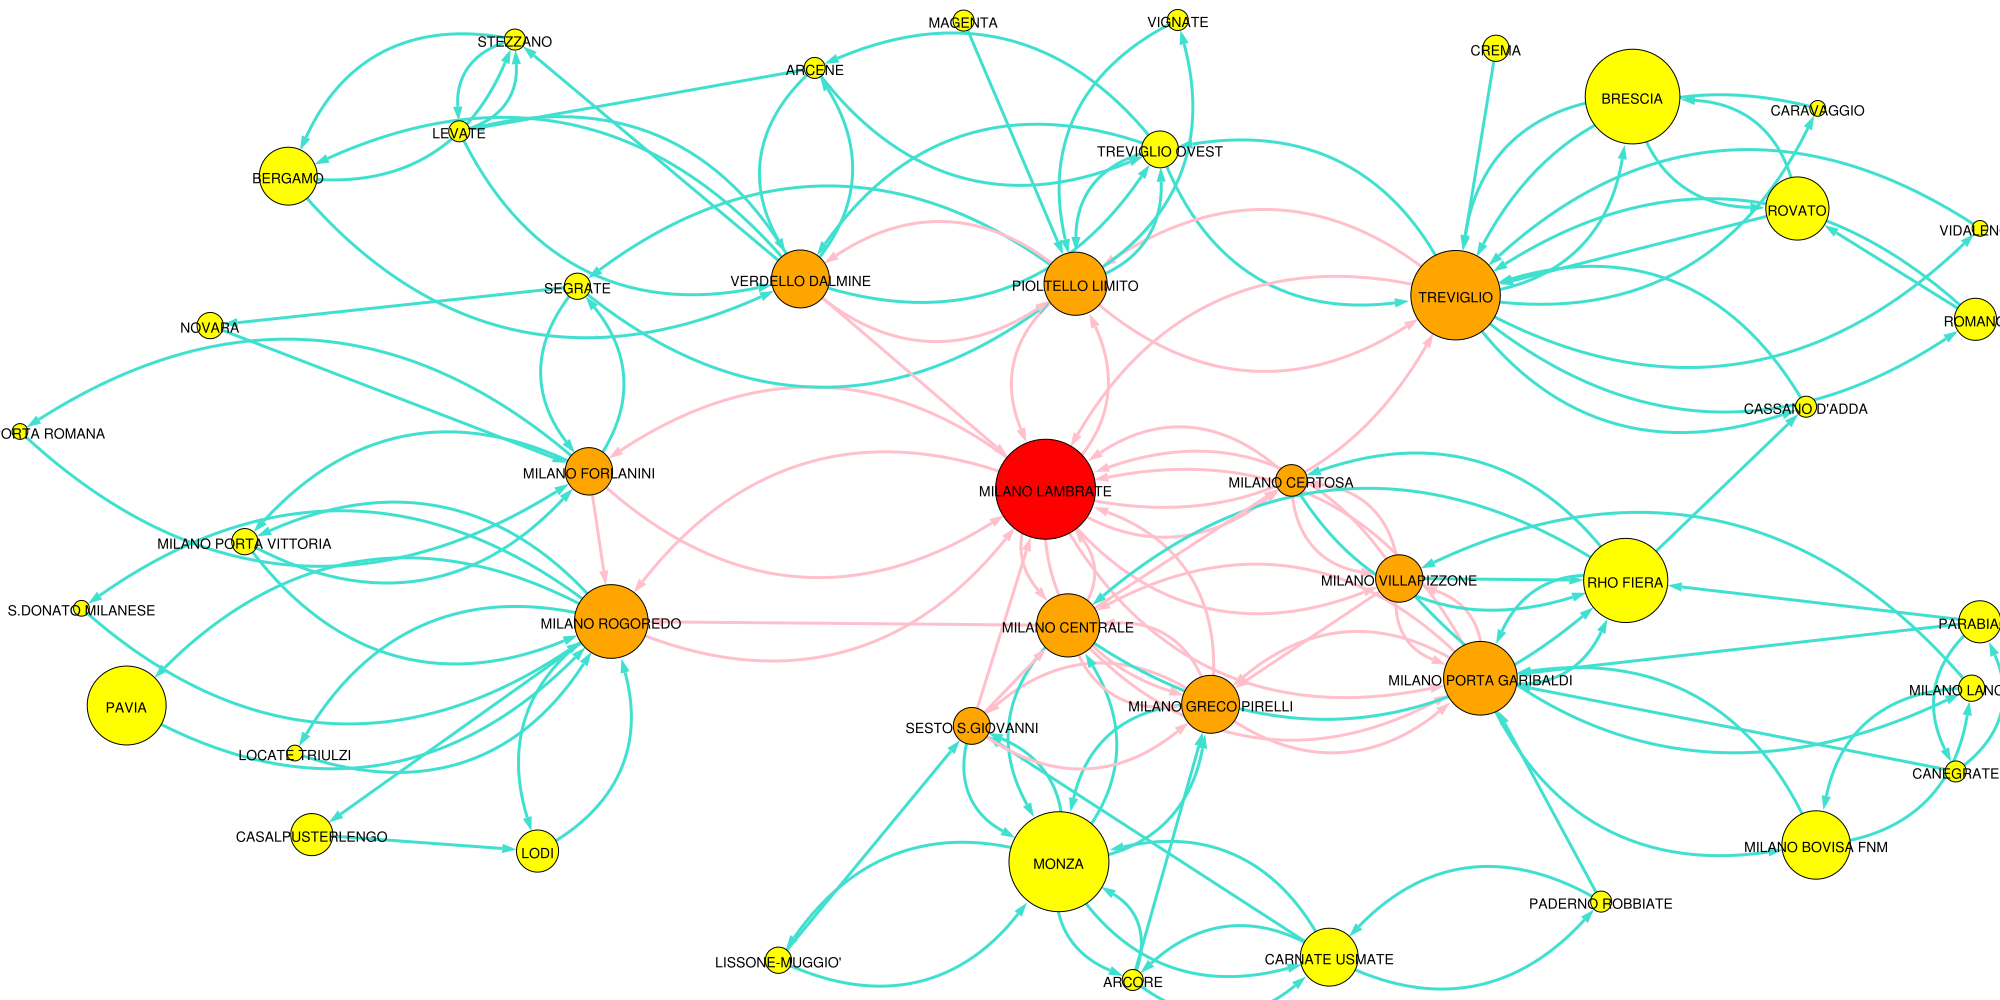

In [29]:
station_name = "MILANO LAMBRATE"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 2, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 2000, 1000),
    'vertex_label': sub_g.vs["label"],
    "vertex_size" : [e*100 for e in sub_g.vs["degree"]],
    "edge_width" : 3
}
ig.plot(sub_g, **vs)

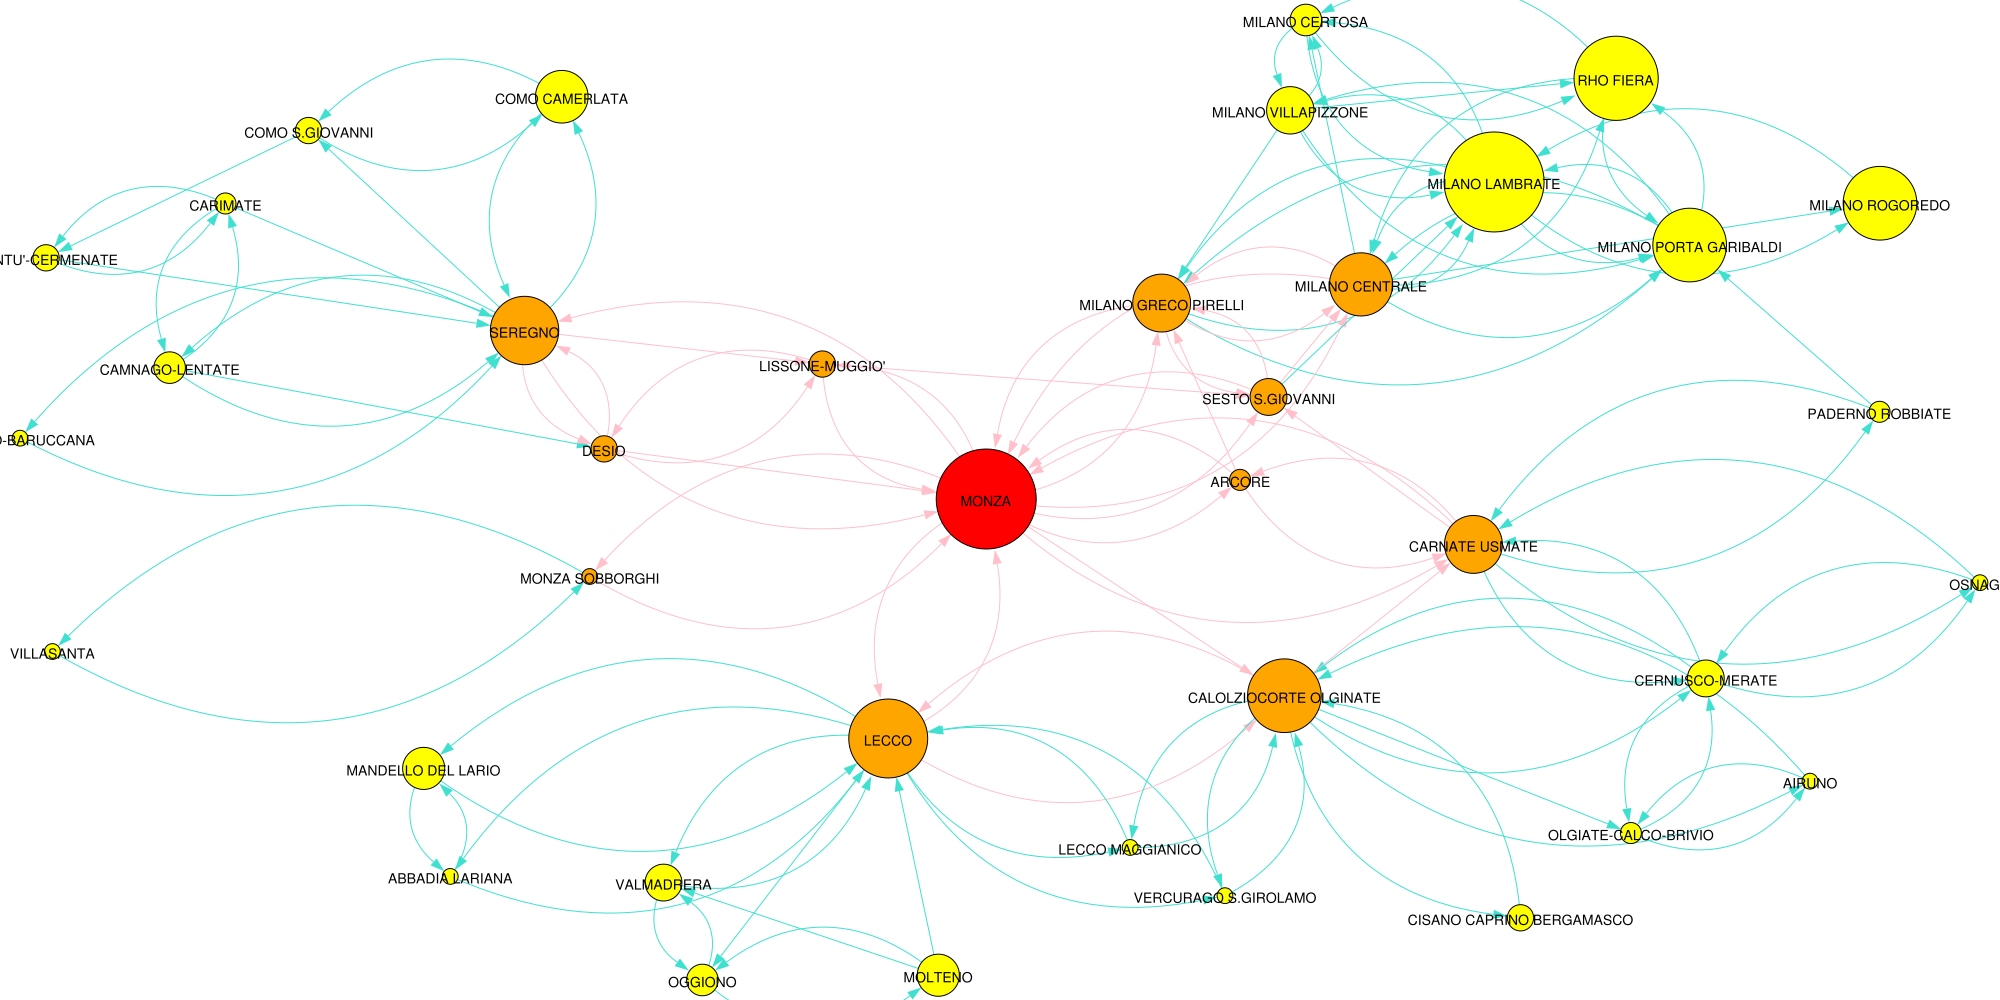

In [30]:
station_name = "MONZA"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 2, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 2000, 1000),
    'vertex_label': sub_g.vs["label"],
    "vertex_size" : [e*100 for e in sub_g.vs["degree"]]
}
ig.plot(sub_g, **vs)

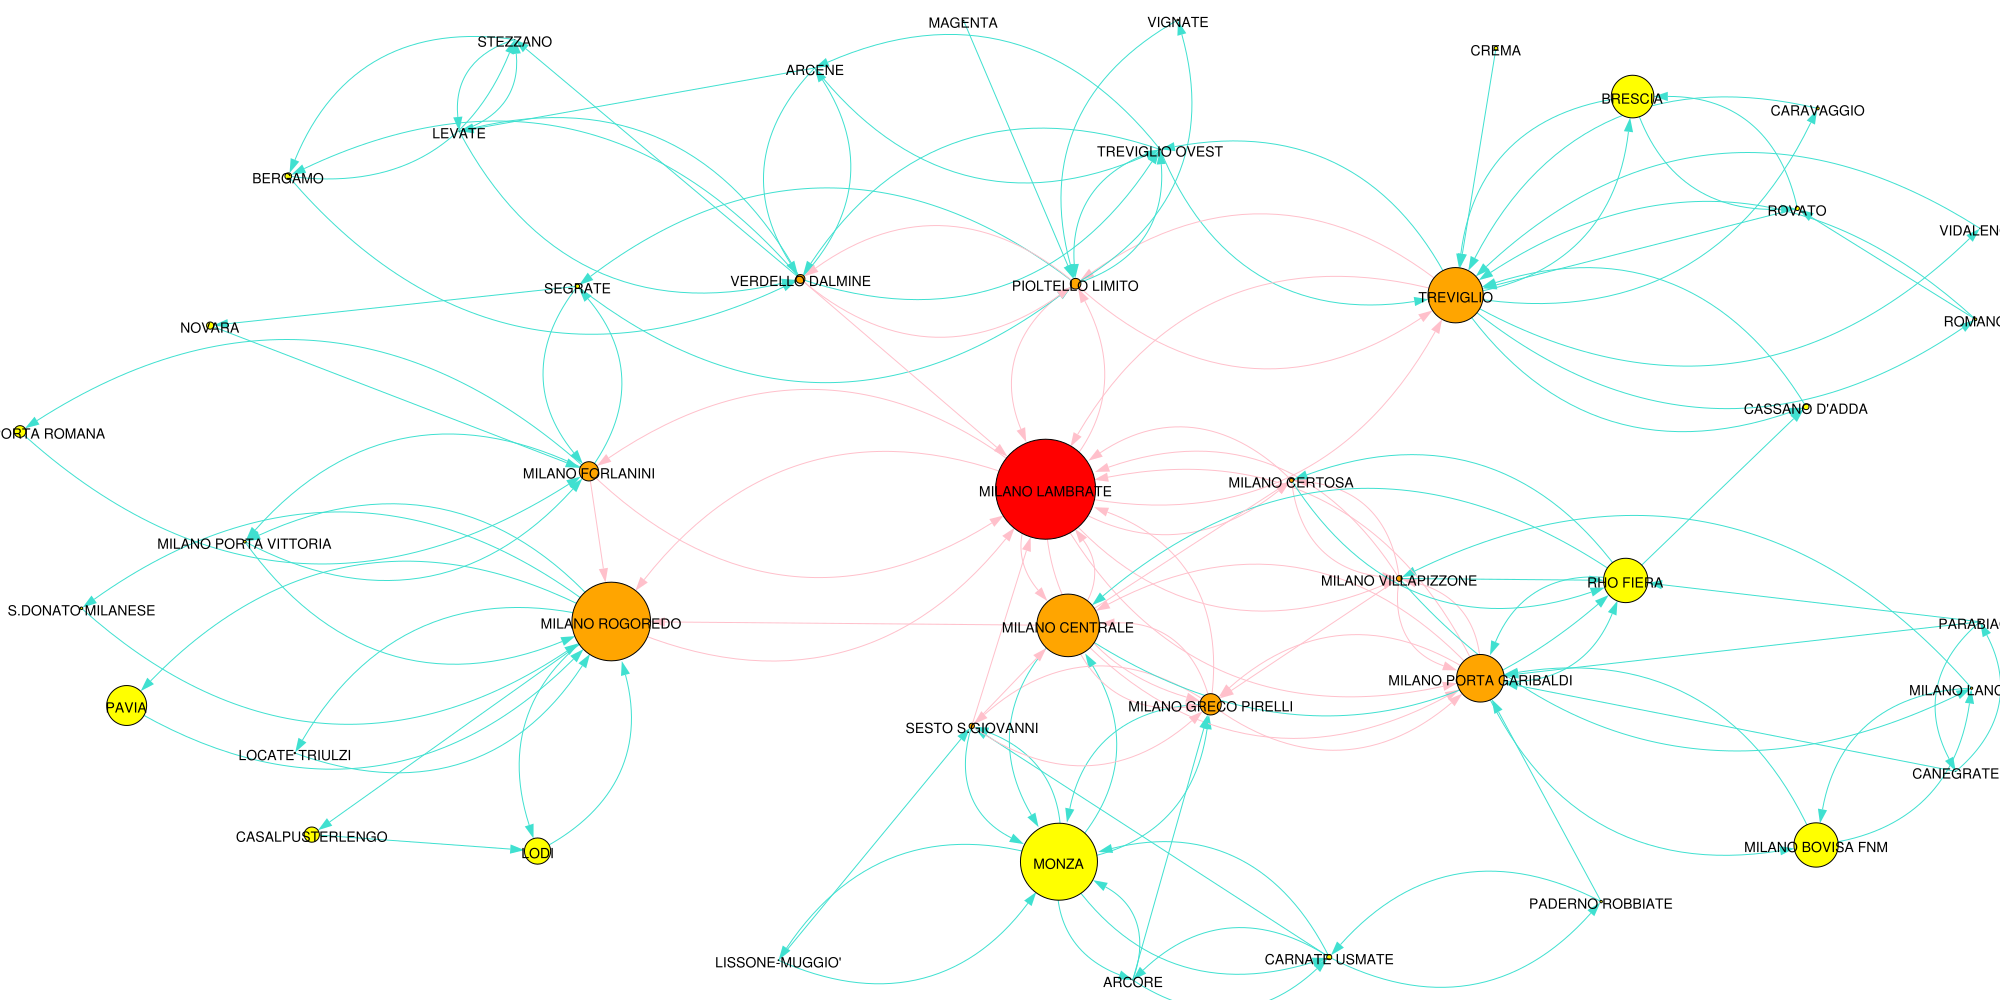

In [31]:
station_name = "MILANO LAMBRATE"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 2, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 2000, 1000),
    'vertex_label': sub_g.vs["label"],
    "vertex_size" : [e*100 for e in sub_g.vs["betweennes"]]
}
ig.plot(sub_g, **vs)

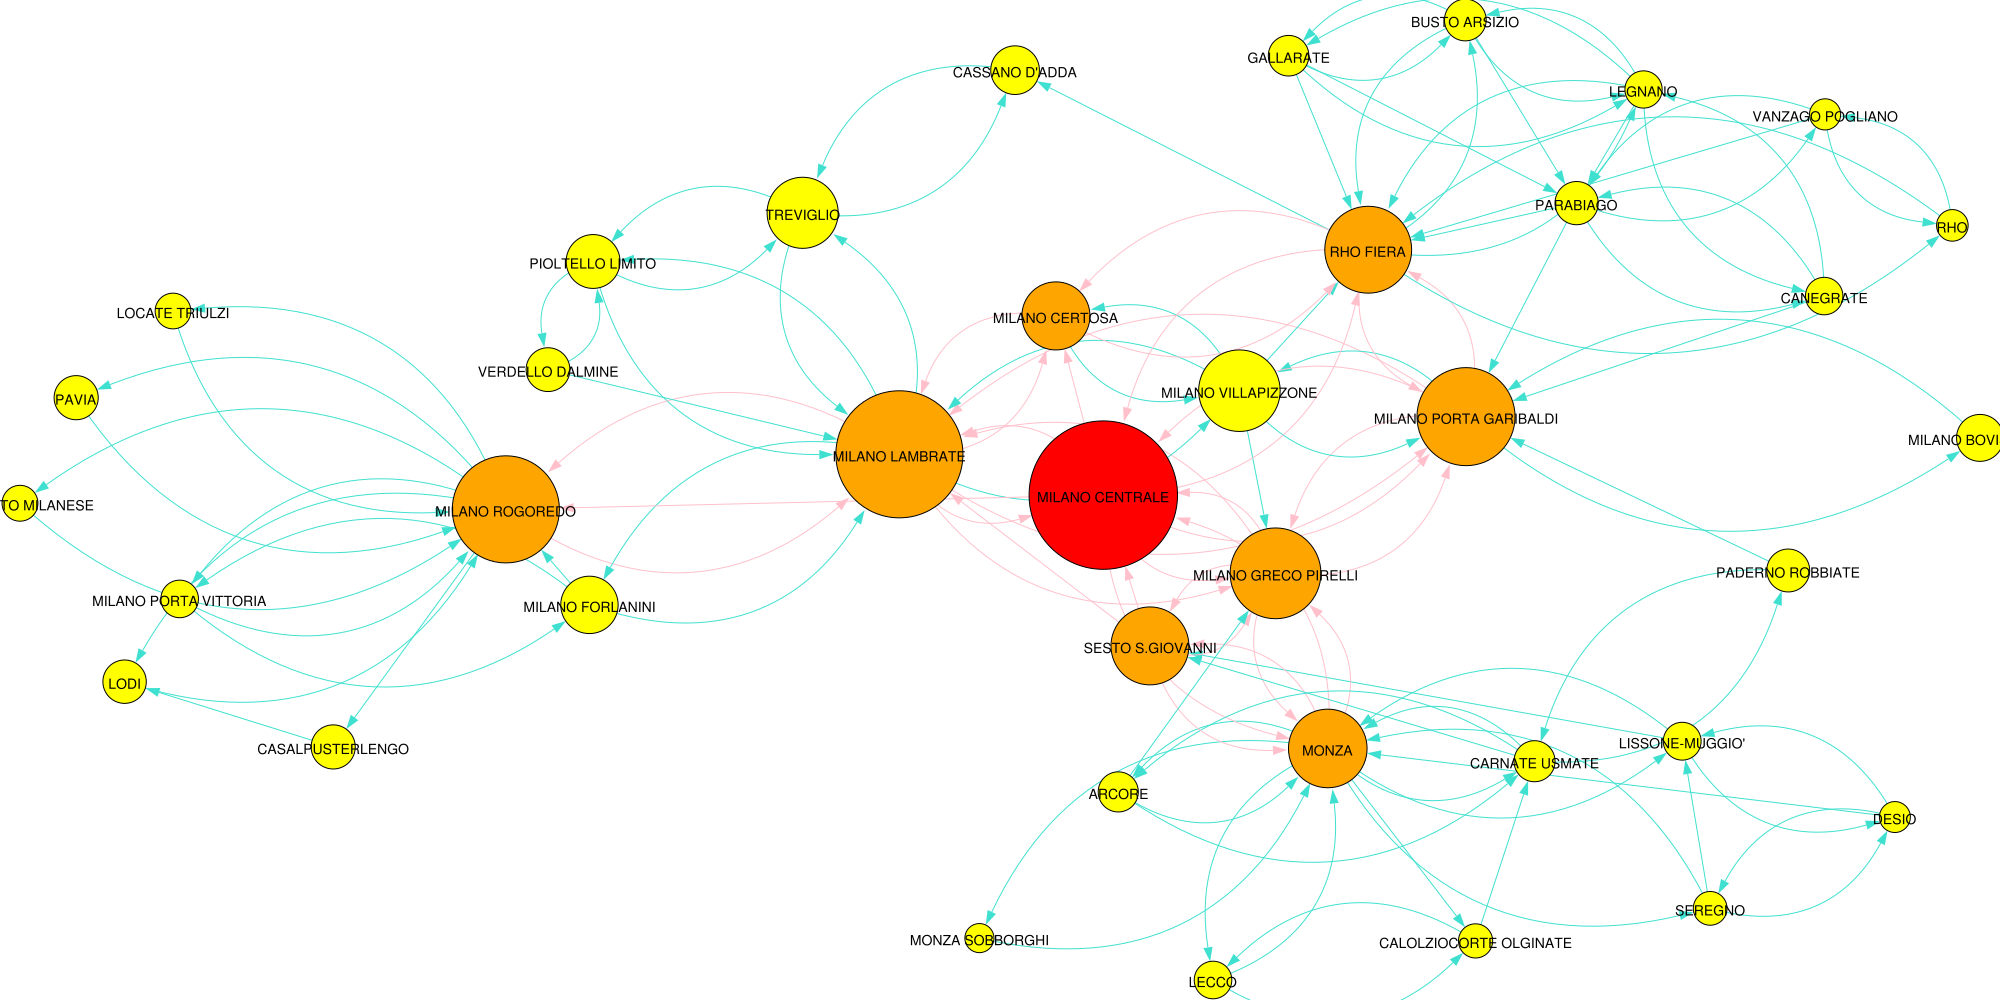

In [32]:
station_name = "MILANO CENTRALE"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 2, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 2000, 1000),
    'vertex_label': sub_g.vs["label"],
    "vertex_size" : [np.exp(e*5) for e in sub_g.vs["closeness"]]
}
ig.plot(sub_g, **vs)

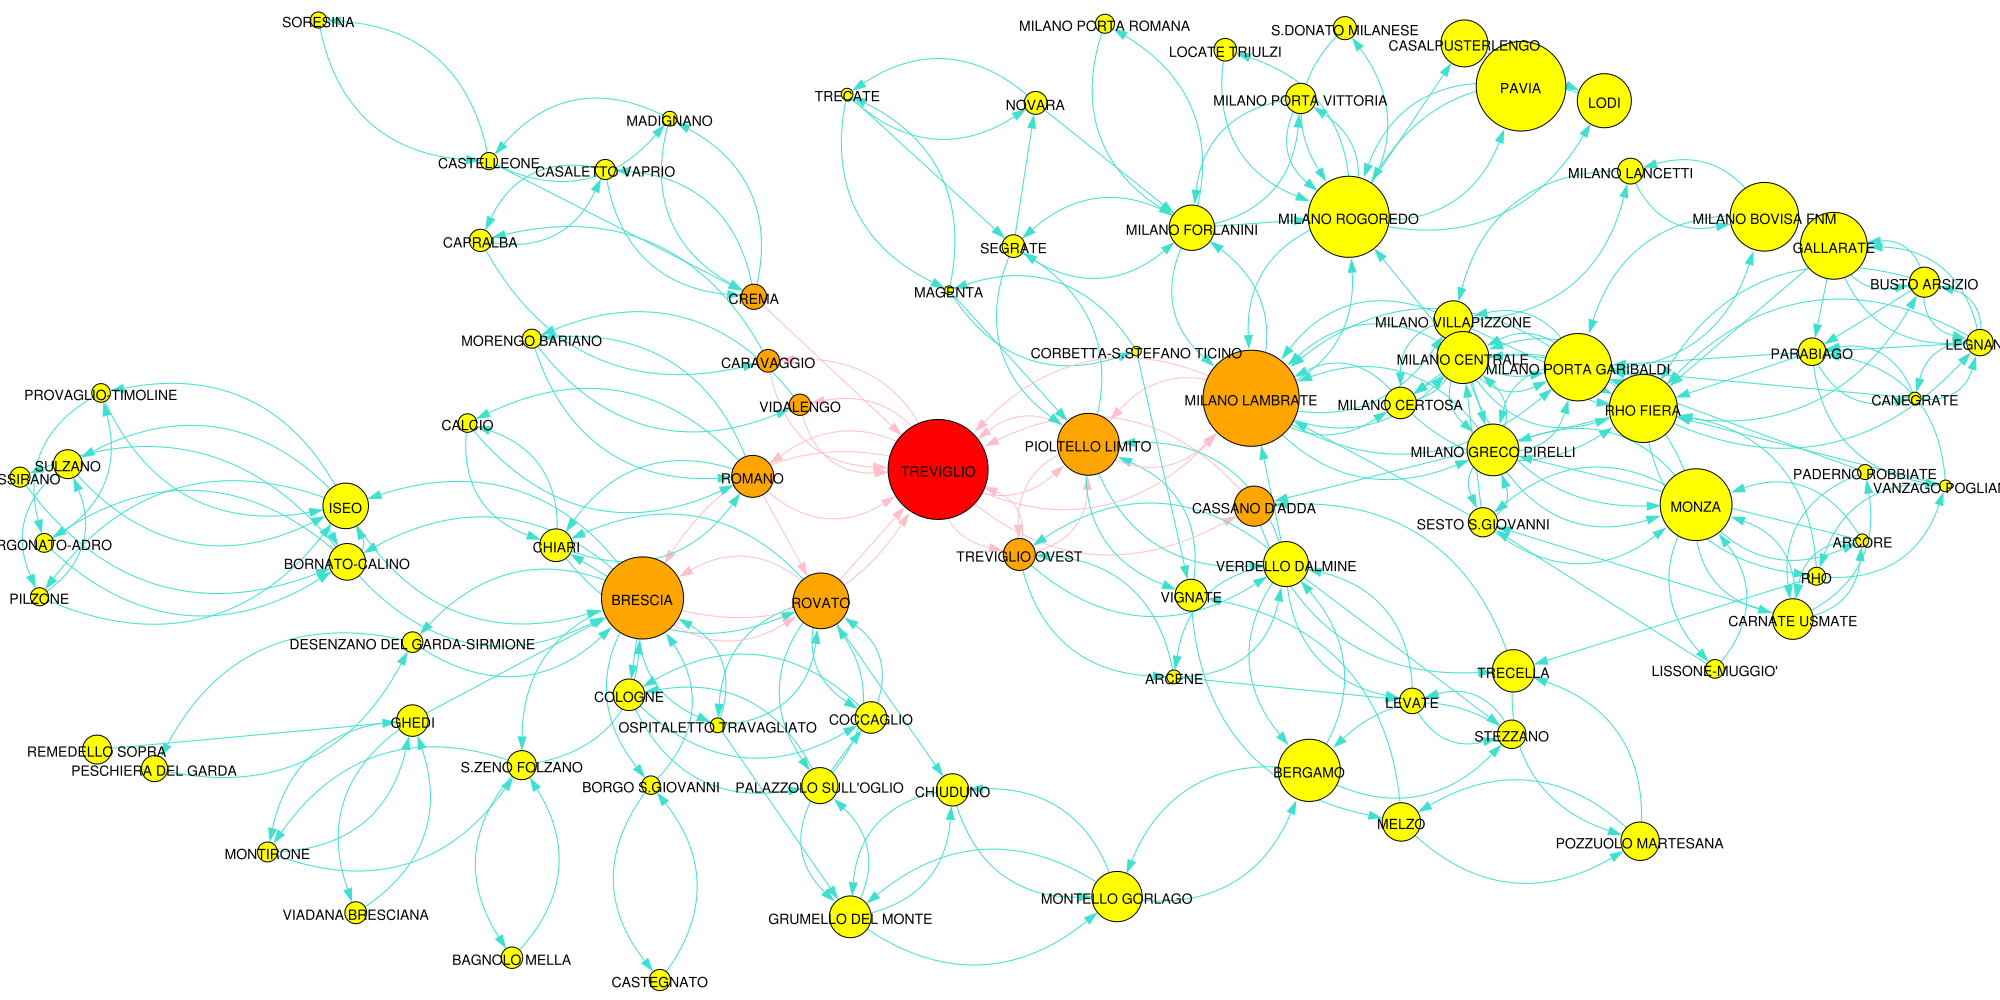

In [62]:
station_name = "TREVIGLIO"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 3, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 2000, 1000),
    'vertex_label': sub_g.vs["label"],
    "vertex_size" : [e*100 for e in sub_g.vs["pagerank"]]
}
ig.plot(sub_g, **vs)

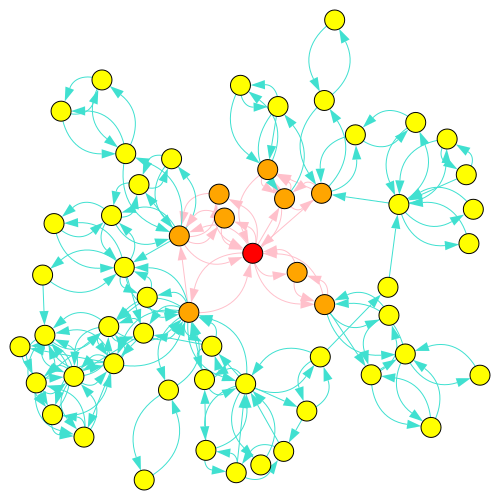

In [80]:
station_name = "LECCO"
source_index = g.vs.select(label = station_name).indices
#set number or neighbour with second value of create sub
sub_g = create_sub(g, 3, source_index)
sub_source_index = sub_g.vs.select(label = station_name).indices
color_set(sub_source_index[0], sub_g)
vs = {
    'layout': 'kk',
    'bbox': (0, 0, 500, 500),
    'vertex_label': None
}
ig.plot(sub_g, **vs)

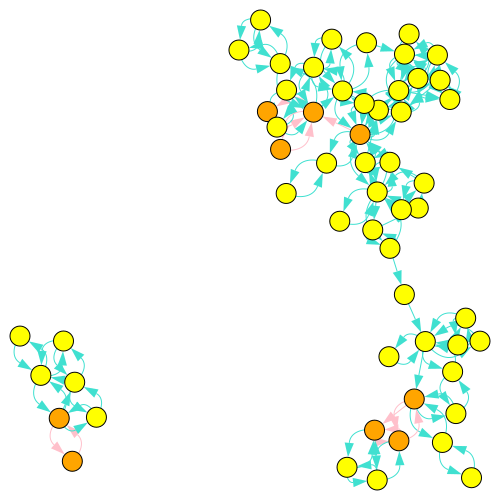

In [81]:
sub_g.delete_vertices(sub_g.vs.find(label = "LECCO").index)
ig.plot(sub_g, **vs)